In [2]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [5]:
f1 = h5py.File(os.path.join('data','Neapel','train','mytestfile2.hdf5'), 'r') 
f2 = h5py.File(os.path.join('data','Neapel','train','predict','mytestfile2_predictions.h5'), 'r') 
print(f1.keys())
print(f2.keys())


<KeysViewHDF5 ['label', 'raw']>
<KeysViewHDF5 ['predictions']>


In [24]:
vol  = f1['raw']
label =f1['label']
pred = np.array(f2['predictions'])[-1,:,:]

print(vol.shape)
print(label.shape)
print(pred.shape)

(30, 301, 301)
(30, 301, 301)
(30, 301, 301)


(-0.5, 300.5, 300.5, -0.5)

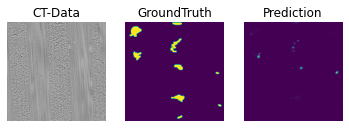

In [36]:
fig, ax = plt.subplots(1,3)
slice = 10
ax[0].imshow(vol[slice,:,:],cmap='gray')
ax[1].imshow(label[slice,:,:])
ax[2].imshow(pred[slice,:,:])

ax[0].title.set_text('CT-Data')
ax[1].title.set_text('GroundTruth')
ax[2].title.set_text('Prediction')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
# plot = ax[2].pcolor(pred[slice,:,:])
# fig.colorbar(plot)